Image: bị nap che.jpg | Match Score: 0.8727908730506897
Object found in bị nap che.jpg at position (550, 805)



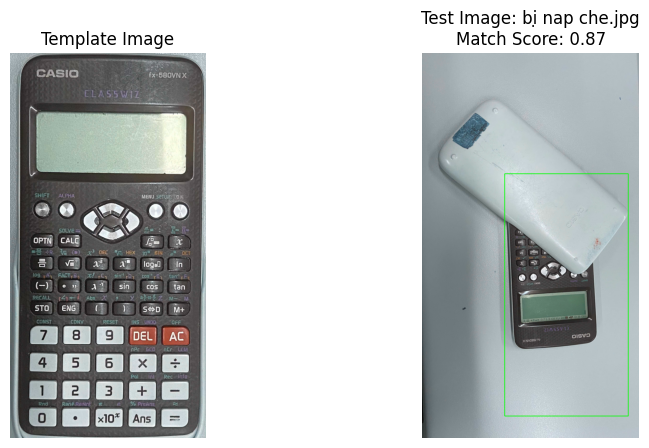

Image: bi ao che.jpg | Match Score: 0.8233972191810608
Object found in bi ao che.jpg at position (598, 952)



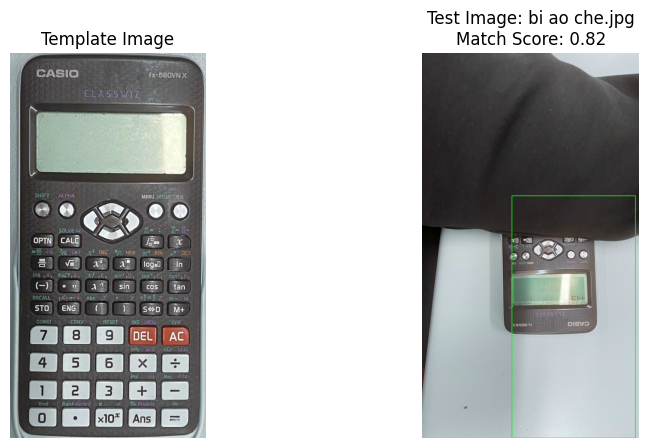

Image: anh co goc khac 1.jpg | Match Score: 0.836932897567749
Object found in anh co goc khac 1.jpg at position (616, 454)



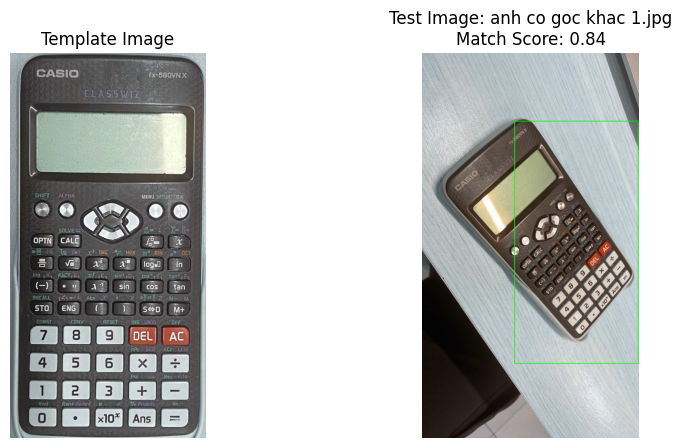

Image: Hinh chup trong toi.jpg | Match Score: 0.787735104560852
Object found in Hinh chup trong toi.jpg at position (129, 47)



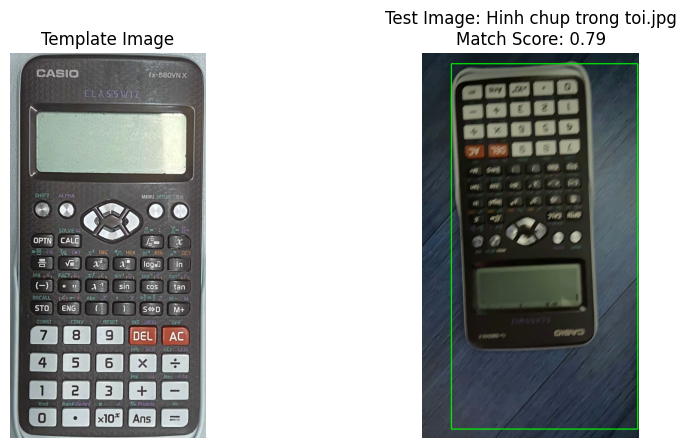

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

def match_template(image, template):
    # So khớp mẫu
    result = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)  # max_loc là tọa độ top-left
    return max_val, max_loc

def object_recognition(template_image_path, image_folder):
    # Đọc ảnh mẫu
    template = preprocess_image(template_image_path)
    template_height, template_width = template.shape[:2]  # Lấy kích thước ảnh mẫu

    # Lặp qua tất cả các ảnh trong thư mục
    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        image = preprocess_image(image_path)  # Đọc ảnh trong thư mục

        # So khớp mẫu với ảnh test
        max_val, max_loc = match_template(image, template)
        print(f"Image: {image_name} | Match Score: {max_val}")


        if max_val > 0.7:
            print(f"Object found in {image_name} at position {max_loc}\n")
            top_left = max_loc
            bottom_right = (top_left[0] + template_width, top_left[1] + template_height)


            image_copy = image.copy()
            cv2.rectangle(image_copy, top_left, bottom_right, (0, 255, 0), 3)


            fig, axs = plt.subplots(1, 2, figsize=(10, 5))


            axs[0].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
            axs[0].set_title("Template Image")
            axs[0].axis('off')

            axs[1].imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
            axs[1].set_title(f"Test Image: {image_name}\nMatch Score: {max_val:.2f}")
            axs[1].axis('off')

            plt.show()
        else:
            print(f"No significant match in {image_name}\n")


# Đường dẫn ảnh mẫu và thư mục chứa ảnh test
template_image_path = '/content/drive/MyDrive/CPV project/hinh mau.jpg'
image_folder = '/content/drive/MyDrive/CPV project/CPV project'

# Gọi hàm nhận diện đối tượng
object_recognition(template_image_path, image_folder)
